In [1]:
import tables
import sys
import numpy as np
import matplotlib.pyplot as plt
# open the h5 file containing the flasher data
# the flasher is 73-24: string 73, DOM 24
my_file=tables.open_file('flasher_run130246.h5')

#read in the charge, time, and receiving DOM info from the file
ctime = my_file.root.FlasherShiftedPulses.cols.time[:]
charge = my_file.root.FlasherShiftedPulses.cols.charge[:]
rstr = my_file.root.FlasherShiftedPulses.cols.string[:]
rdom = my_file.root.FlasherShiftedPulses.cols.om[:]

In [2]:
# This code reads the geometry of the detector 
# into a dictionary so you can check distances

infile = open('Icecube_geometry.20070430.complete.txt')
lines = infile.readlines()

geo = {}

for line in lines:
    linesplit = line.split()
    s = linesplit[0]
    d = linesplit[1]
    x = (float(linesplit[2]))
    y = (float(linesplit[3]))
    z = (float(linesplit[4]))
    mydom = s+'-'+d
    geo[mydom] = {}
    geo[mydom]['x'] = x
    geo[mydom]['y'] = y
    geo[mydom]['z'] = z
infile.close()


In [3]:
# This function calculates the light travel time 
# between two DOMs, using the geometry dictionary
# and the fact that the index of refraction of light in ice
# is n = 1.36
# Light travel time is converted into ns

def light_time(geodict,fstr,fdom,rstr,rdom):
    flasher = str(fstr)+'-'+str(fdom)
    receiver = str(rstr)+'-'+str(rdom)
    dist = np.sqrt((geodict[flasher]['x'] - geodict[receiver]['x'])**2+(geodict[flasher]['y'] - geodict[receiver]['y'])**2+(geodict[flasher]['z'] - geodict[receiver]['z'])**2)
    return (dist/(3e8/1.36))/1e-9

In [14]:
# specify the flashing string and flashing dom
# this does not change unless you change files
fstrval = 73
fdomval = 24

# specify reciving string and receiving dom
# this can be any DOM, though more distant DOMs
# will not receive light
rstrval = 73
rdomval = 22

# get the charge and time for the specified receiving DOM
cut = (charge[:]>0)&(rstr[:]==rstrval)&(rdom[:]==rdomval) 

flasherinfo =  rdom


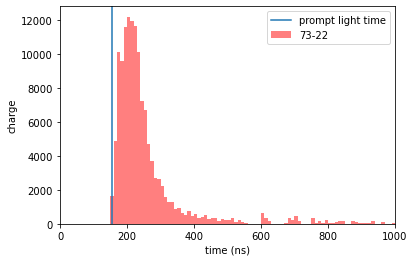

In [15]:
# this normalizes the charge to the number of flashers, 
# so you can compare data to simulation
# or compare different runs
weightvec = [i/float(len(flasherinfo)) for i in charge[cut]]

# this calculates the prompt light travel time
# between the flashing and receiving DOM
prompt_time = light_time(geo,fstrval,fdomval,rstrval,rdomval)


# this plots the histogram and marks the prompt light travel time
plt.clf()
plt.hist(ctime[cut],weights=charge[cut],bins=100,range=[0,1000],alpha=0.5,color='red', label=str(rstrval)+'-'+str(rdomval))
plt.xlim(0,1000)
plt.xlabel('time (ns)')
plt.ylabel('charge')
plt.axvline(prompt_time,label='prompt light time')
plt.legend()
plt.show()
